In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
dataset=pd.read_csv("Avalancheprediction.csv")
dataset

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,H,52,-17,19,2
1,24,L,23,-8,19,0
2,15,H,30,7,19,0
3,27,L,61,-13,25,1
4,34,H,4,-20,7,0
...,...,...,...,...,...,...
199,34,M,44,6,6,0
200,34,L,73,-34,13,2
201,34,M,33,13,35,1
202,34,L,51,-4,35,1


In [3]:
dataset.isnull().any()

Slope              False
Forest Density     False
Snow Density       False
Air Temperature    False
Wind               False
Prediction         False
dtype: bool

In [4]:
dataset.head()

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,H,52,-17,19,2
1,24,L,23,-8,19,0
2,15,H,30,7,19,0
3,27,L,61,-13,25,1
4,34,H,4,-20,7,0


In [5]:
dataset.tail()

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
199,34,M,44,6,6,0
200,34,L,73,-34,13,2
201,34,M,33,13,35,1
202,34,L,51,-4,35,1
203,34,M,59,-29,8,2


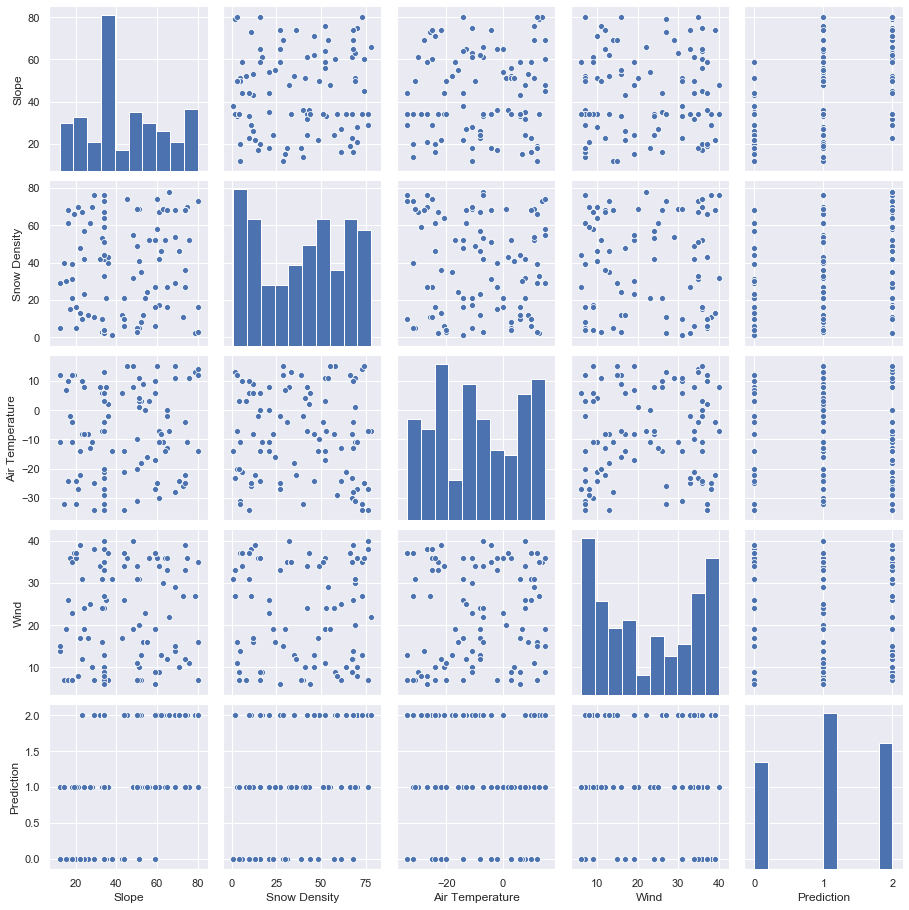

In [6]:
sns.set(style='darkgrid')
sns.pairplot(dataset) #scatterpoints for all relation between all columns which are numerical

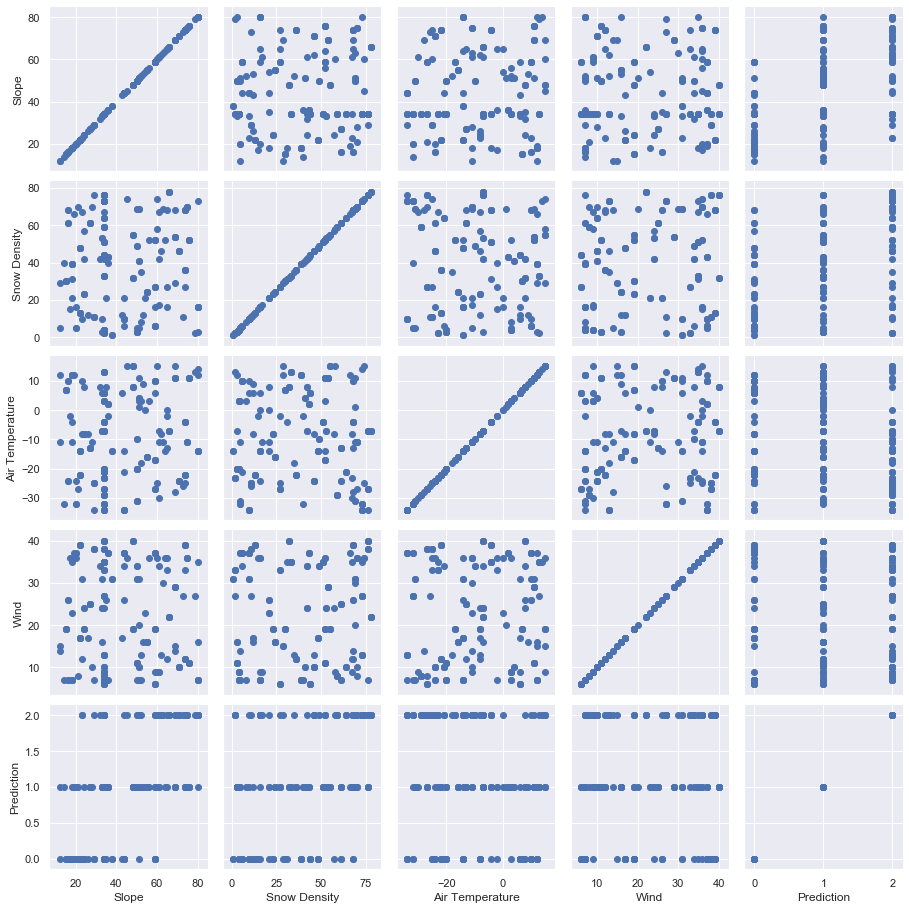

In [7]:
sns.set(style='darkgrid')
a=sns.PairGrid(dataset)
a.map(plt.scatter)

In [8]:
data=dataset['Forest Density'].value_counts()
points=data.index
points

Index(['L', 'M', 'H'], dtype='object')

In [9]:
data=dataset['Forest Density'].value_counts()
data


L    76
M    66
H    62
Name: Forest Density, dtype: int64

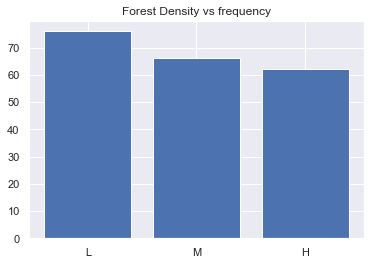

In [10]:
fig,ax=plt.subplots()
data=dataset['Forest Density'].value_counts()
points=data.index
frequency=data.values
ax.bar(points,frequency)
ax.set_title('Forest Density vs frequency')
ax.set_label('Forest Density')
ax.set_label('Frequency')

In [11]:
dataset['Air Temperature'].value_counts()

-7     13
-14    12
 11     9
-4      9
-34     9
-22     8
-20     8
-11     8
-24     7
-27     7
-32     7
-8      7
 6      7
 3      7
 10     7
 12     7
 8      6
 15     6
-13     5
-25     5
 13     5
-29     4
-21     4
-16     4
-23     4
 7      4
-31     3
-17     3
-2      3
 2      3
-10     2
 4      2
 0      2
 1      1
-18     1
-30     1
-28     1
-26     1
 14     1
 9      1
Name: Air Temperature, dtype: int64

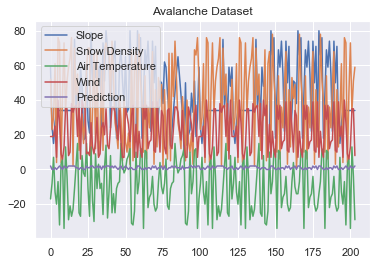

In [12]:
dataset.plot.line(title='Avalanche Dataset')#pandas visualizations


In [13]:
# Each columns w.r.t to frequency except categorical using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000181EFEB5E08>,
      dtype=object)

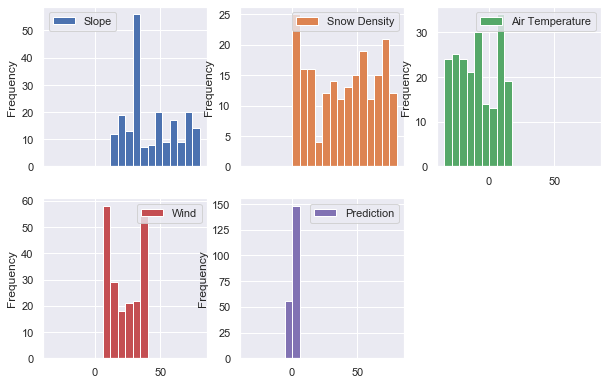

In [14]:
dataset.plot.hist(subplots=True, layout=(3,3), figsize=(10, 10),bins=20)#bins is size of each bin,figsize represent the size of each fig.

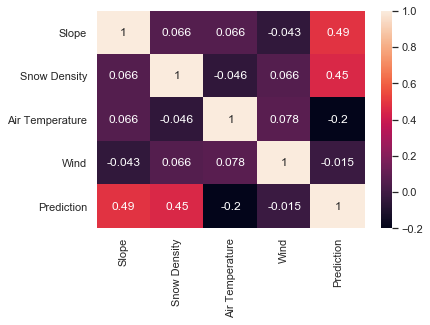

In [15]:
sns.set(style='darkgrid')
sns.heatmap(dataset.corr(),annot=True)

(array([56.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 82.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

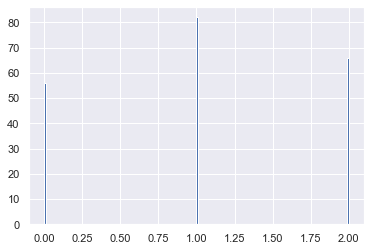

In [16]:
plt.hist(dataset['Prediction'],bins=200) 

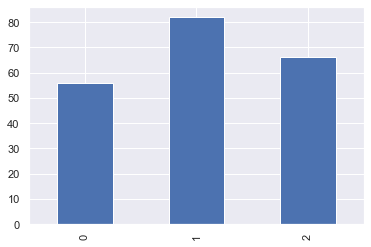

In [17]:
dataset['Prediction'].value_counts().sort_index().plot.bar()

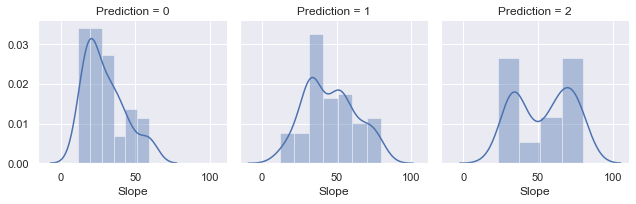

In [18]:
sns.set(style='darkgrid')
g = sns.FacetGrid(dataset, col='Prediction') 
g = g.map(sns.distplot, 'Slope')

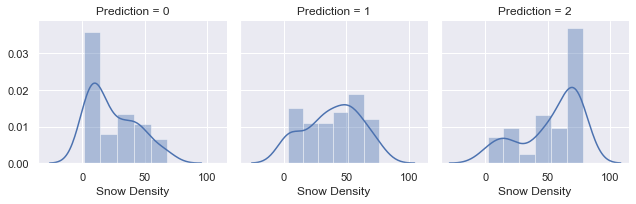

In [19]:
sns.set(style='darkgrid')
g = sns.FacetGrid(dataset, col='Prediction') #snow Density between 50 t0 60 is most proned to occurence of avalanche
g = g.map(sns.distplot, 'Snow Density')

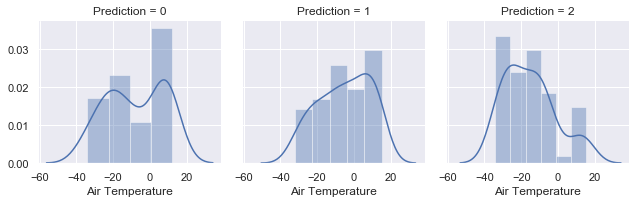

In [20]:
sns.set(style='darkgrid')
g = sns.FacetGrid(dataset, col='Prediction') #Air temperature between -40 t0 -20 effect the most  proned to avalanche occurence
g = g.map(sns.distplot, 'Air Temperature')

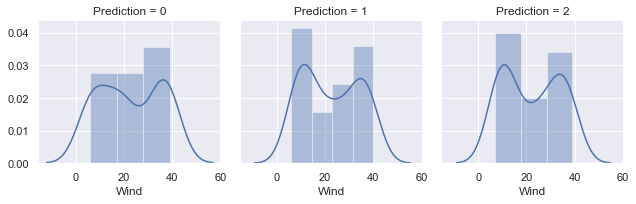

In [21]:
sns.set(style='darkgrid')
g = sns.FacetGrid(dataset, col='Prediction')
g = g.map(sns.distplot, 'Wind')

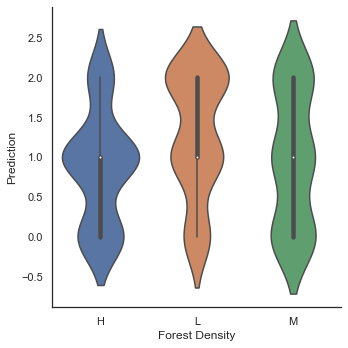

In [22]:
sns.set(style='white')
sns.catplot(x='Forest Density',y='Prediction',kind='violin',  data=dataset) #Low Forest density causes more avalanches from catplot

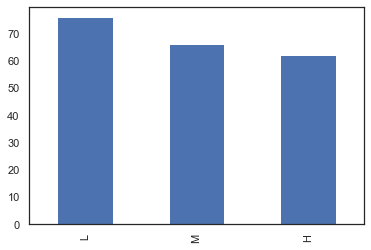

In [23]:
dataset['Forest Density'].value_counts().plot.bar()

In [24]:
x=dataset.iloc[:,0:5].values
x

array([[59, 'H', 52, -17, 19],
       [24, 'L', 23, -8, 19],
       [15, 'H', 30, 7, 19],
       ...,
       [34, 'M', 33, 13, 35],
       [34, 'L', 51, -4, 35],
       [34, 'M', 59, -29, 8]], dtype=object)

In [25]:
y=dataset.iloc[:,5:].values
y

array([[2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [2],
       [1],
    

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([("on",OneHotEncoder(),[1])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 52, -17, 19],
       [0.0, 1.0, 0.0, ..., 23, -8, 19],
       [1.0, 0.0, 0.0, ..., 30, 7, 19],
       ...,
       [0.0, 0.0, 1.0, ..., 33, 13, 35],
       [0.0, 1.0, 0.0, ..., 51, -4, 35],
       [0.0, 0.0, 1.0, ..., 59, -29, 8]], dtype=object)

In [27]:
x=x[:,1:]
x

array([[0.0, 0.0, 59, 52, -17, 19],
       [1.0, 0.0, 24, 23, -8, 19],
       [0.0, 0.0, 15, 30, 7, 19],
       ...,
       [0.0, 1.0, 34, 33, 13, 35],
       [1.0, 0.0, 34, 51, -4, 35],
       [0.0, 1.0, 34, 59, -29, 8]], dtype=object)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [29]:
x_train

array([[0.0, 1.0, 16, 68, 10, 26],
       [0.0, 0.0, 69, 54, 11, 29],
       [1.0, 0.0, 34, 76, -27, 38],
       ...,
       [1.0, 0.0, 48, 55, 15, 19],
       [0.0, 1.0, 69, 29, 15, 15],
       [0.0, 0.0, 74, 36, -22, 12]], dtype=object)

In [30]:
y_train

array([[0],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
    

In [31]:
x_test

array([[1.0, 0.0, 48, 55, 15, 19],
       [0.0, 0.0, 26, 12, -8, 17],
       [1.0, 0.0, 61, 17, -11, 9],
       [1.0, 0.0, 80, 73, 14, 35],
       [0.0, 1.0, 34, 33, 13, 35],
       [0.0, 0.0, 50, 5, -31, 7],
       [1.0, 0.0, 34, 76, -7, 40],
       [1.0, 0.0, 27, 61, -13, 25],
       [0.0, 1.0, 34, 59, -29, 8],
       [1.0, 0.0, 59, 6, 10, 37],
       [0.0, 1.0, 18, 39, 12, 7],
       [0.0, 0.0, 55, 24, -16, 16],
       [1.0, 0.0, 66, 78, -7, 22],
       [1.0, 0.0, 22, 13, -22, 39],
       [0.0, 0.0, 55, 24, -16, 16],
       [1.0, 0.0, 34, 4, 3, 9],
       [0.0, 1.0, 34, 44, 6, 6],
       [0.0, 1.0, 34, 33, 13, 35],
       [0.0, 0.0, 38, 1, -14, 31],
       [0.0, 0.0, 55, 24, -16, 16],
       [1.0, 0.0, 18, 21, -11, 23]], dtype=object)

In [32]:
y_test

array([[1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
y_predict=dt.predict(x_test)
y_predict

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [35]:
y_test

array([[1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [36]:
dt.predict([[1.0,0.0,54,24,15,19]])

array([1], dtype=int64)

In [37]:
pickle.dump(dt,open('project.pkl','wb'))

In [38]:
accuracy_score(y_test,y_predict)

0.9047619047619048

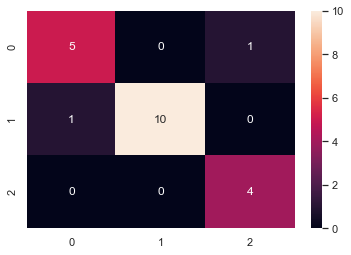

In [39]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

C:\Users\PALLE BHARATH\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


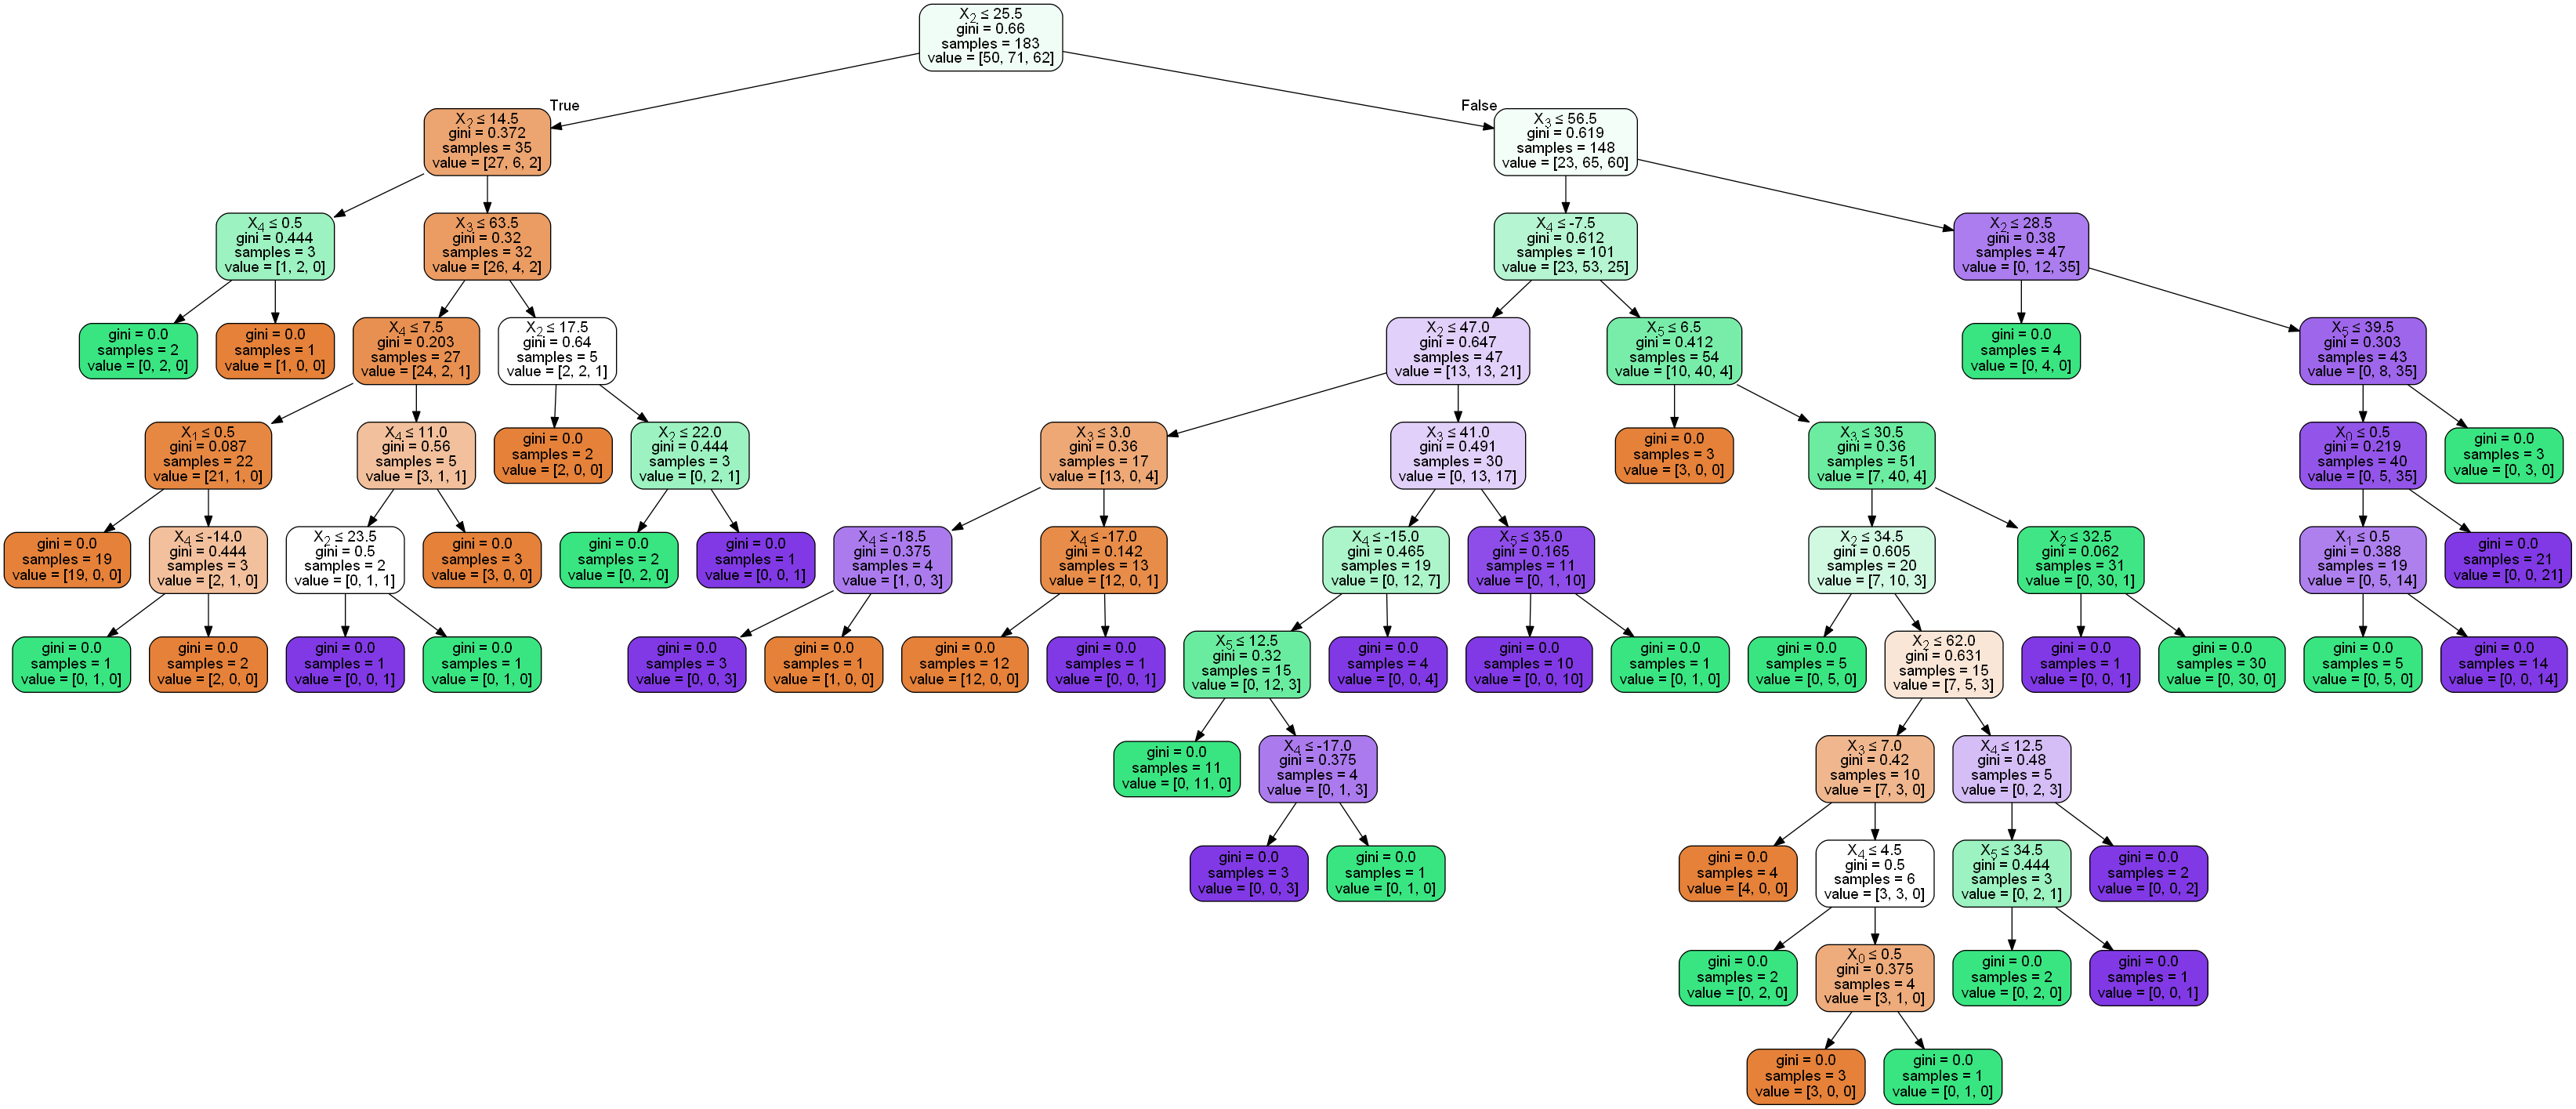

In [40]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
